In [1]:
pip install apyori

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'd:\Microsoft Visual Studio\Shared\Python37_64\python.exe -m pip install --upgrade pip' command.


In [2]:
#資料處理
dataPath=r'Trade_Data_Normalization_v7.csv'
dataList=[]
import csv
with open(dataPath, "r", newline="") as csvData:
  reader = csv.reader(csvData)
  for r in reader:
     dataList.append(r)

In [6]:
from apyori import apriori
x=[]
y=[]
z=[]
st=[]
setItem=[]
import time
for xA in range(1,10):
    for yA in range(1,10):
        timeStart=time.time()
        association_rules = apriori(dataList, min_support=xA/10, min_confidence=yA/10)
        timeFinish=time.time()
        association_results = list(association_rules)
        if(len(association_results)>0):
            lData=[xA/10,yA/10,len(association_results),(timeFinish - timeStart)]
            x.append(xA/10)
            y.append(yA/10)
            st.append(timeFinish - timeStart)
            z.append(len(association_results))
            aRule=[]
            for ar in association_results:
                aRule.append(list(ar.items))
            item=[xA/10,yA/10,aRule]
            setItem.append(item)
support= input("請輸入支持度:")
print("您輸入的支持度為:"+support)
confidence= input("請輸入信心度:")
print("您輸入的信心度為:"+confidence)
item= input("請輸入商品類型(PRODUCT_TYPE，若有多項請以「,」分開):")
print("您輸入的商品類型為:"+item)
RProductList=[]
RProduct="";
for si in setItem:
    if(si[0]==float(support)):
        if(si[1]==float(confidence)):
            RProductList=si[2]
inputItem=item.split(',')
inputItemList=[]
for ii in range(0,len(inputItem)):
    isSave=False
    if(inputItemList!=[]):
        for iil in range(0,len(inputItemList)):
            if(inputItem[ii]==inputItemList[iil]):
                isSave=True
                break
    if(isSave ==False):
        inputItemList.append(inputItem[ii])
print("==============================")
print("為您推薦以下商品類型:")
chkMax=len(inputItemList)
chkTime=0
itemSet=[]
for x2 in RProductList:
    if(len(x2)>chkMax):
        for i in range(0,len(inputItemList)):
            if inputItemList[i] in x2:
                chkTime=chkTime+1
        if(chkTime==chkMax):
            for xi in range(0,len(x2)):
                itemSet.append(x2[xi])
itemSetList=[]
for i in range(0,len(itemSet)):
    isSave=False
    for isl in range(0,len(itemSetList)):
        if(itemSet[i]==itemSetList[isl]):
            isSave=True
            break
    if(isSave==False):
        itemSetList.append(itemSet[i])
print(itemSetList)

您輸入的支持度為:0.1
您輸入的信心度為:0.2
您輸入的商品類型為:d
為您推薦以下商品類型:
[]


C:\Users\Cheng Gang Wong\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  after removing the cwd from sys.path.


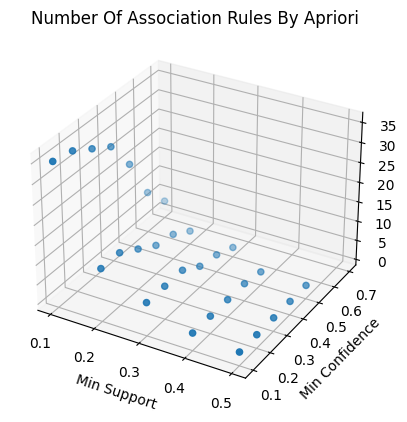

C:\Users\Cheng Gang Wong\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  # This is added back by InteractiveShellApp.init_path()


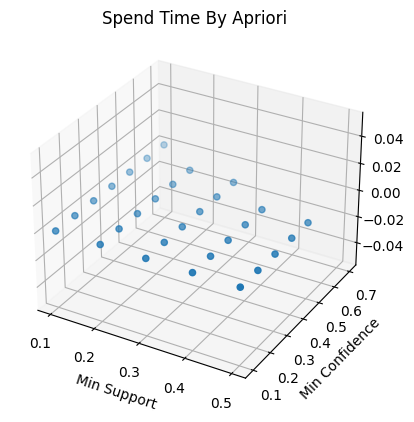

In [8]:
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, cmap='Blues', marker='o')
plt.title("Number Of Association Rules By Apriori")
plt.xlabel("Min Support")
plt.ylabel("Min Confidence")
plt.show()
fig2 = plt.figure()
ax2 = fig2.gca(projection='3d')
ax2.scatter(x, y, st, cmap='Blues', marker='o')
plt.title("Spend Time By Apriori")
plt.xlabel("Min Support")
plt.ylabel("Min Confidence")
plt.show()
